In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# taking data from a url
url = 'http://bit.ly/drinksbycountry'

In [ ]:
# convert data into tabular format
pd.read_table(url)

In [ ]:
# for columnwise
pd.read_table(url,sep=',')

In [4]:
# loading data from other folder
data=pd.read_csv('beer-servings.csv')

In [5]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [6]:
# check the data. we can see an additional column
# will present in the table. python defualt give an index
# to the dataset. to solve the problem
# data.drop('Unnamed:0',inplace=True, axis=1)
# or
data = pd.read_csv('beer-servings.csv', index_col='Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [7]:
data.shape

(193, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [9]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [10]:
# to handle the missing values
# // filling missing values
# check the datatypes of the columns
data.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

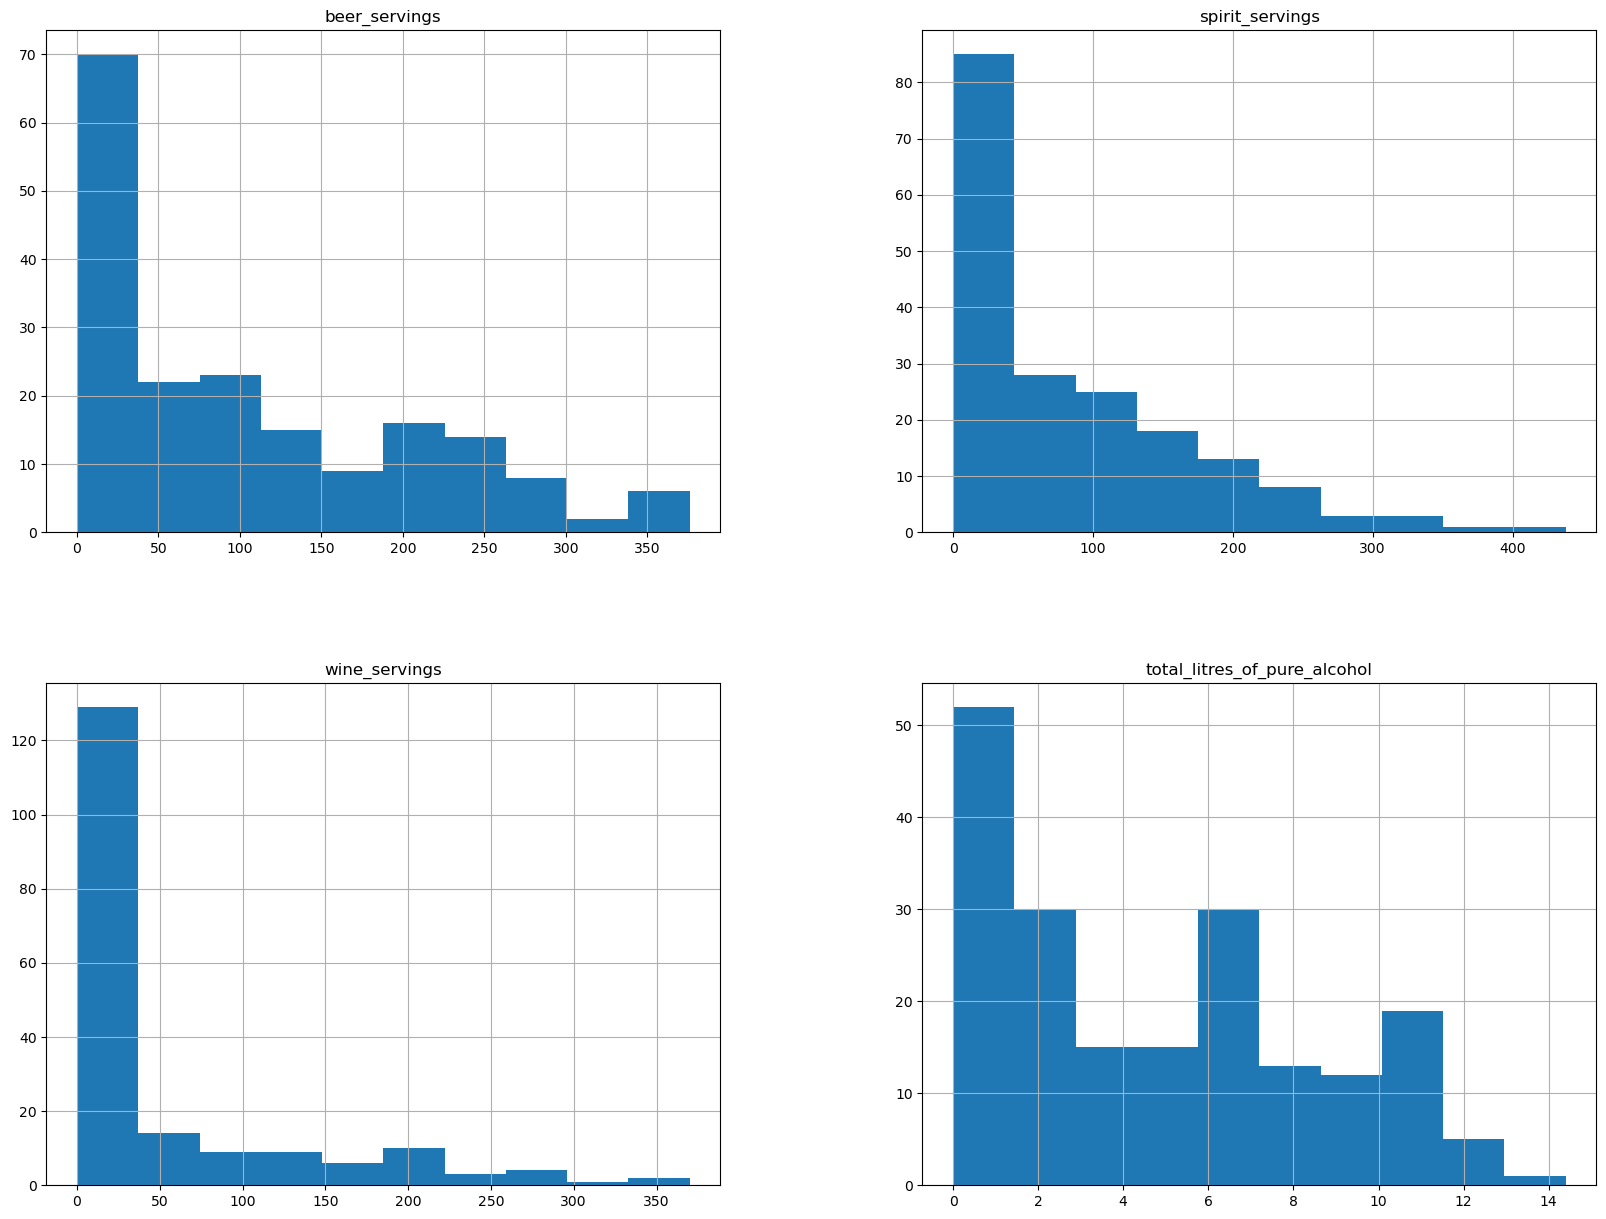

In [11]:
dgraph = data.select_dtypes(include = ['float'])
dgraph.hist(figsize=(20,15))
plt.show()

In [12]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [13]:
data['beer_servings'] = data['beer_servings'].fillna(data['beer_servings'].median())
# check for the null value
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [14]:
for i in ['spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol']:
  data[i]= data[i].fillna(data[i].median())

In [15]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [16]:
# take the mean on beer servings with respect to
# different continents
data.groupby('continent')['beer_servings'].mean()

continent
Africa            61.471698
Asia              40.613636
Europe           190.822222
North America    145.434783
Oceania           89.687500
South America    137.000000
Name: beer_servings, dtype: float64

In [17]:
# check the number of unique values is presented
# in the country column
data.country.nunique()

193

In [18]:
data.drop('country', axis=1, inplace= True)

In [19]:
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,312.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa


Text(0.5, 1.0, 'Box plot of beer servings')

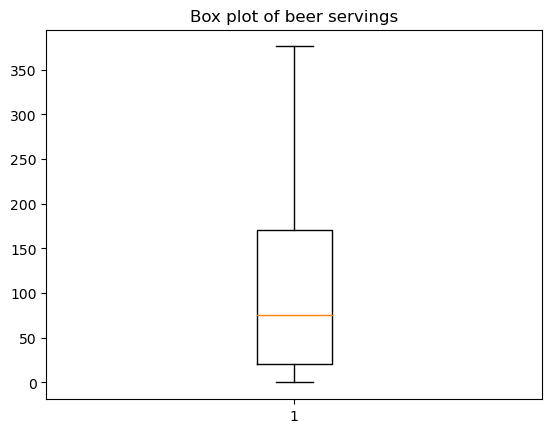

In [20]:
# outliers in beer_servings column
plt.boxplot(data['beer_servings'])
plt.title('Box plot of beer servings')
# no outliers

Text(0.5, 1.0, 'Box plot of spirit servings')

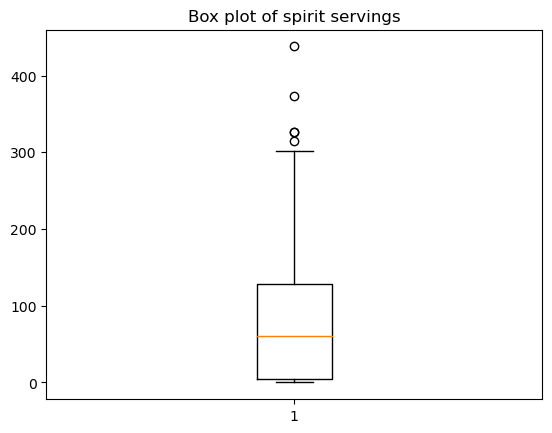

In [21]:
plt.boxplot(data['spirit_servings'])
plt.title('Box plot of spirit servings')
# here outliers are presented in this column. we using
# the inter quartile range to manage the outliers

In [22]:
q1 = np.percentile(data['spirit_servings'],25,
                   interpolation='midpoint')
q2 = np.percentile(data['spirit_servings'],50,
                   interpolation='midpoint')
q3 = np.percentile(data['spirit_servings'],75,
                   interpolation='midpoint')
print(q1)
print(q2)
print(q3)

5.0
60.0
128.0


C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_15240\1535930474.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data['spirit_servings'],25,
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_15240\1535930474.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2 = np.percentile(data['spirit_servings'],50,
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_15240\1535930474.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 

In [23]:
data['spirit_servings'].median()

60.0

In [24]:
# inter quartile range
iqr = q3-q1
#  from iqr, we can find the lower limit and the upper
# limit and we remove the value below the lower limit
# and above the upper limit
# for that
low_limit = q1-1.5*iqr
up_limit = q3+1.5*iqr
print(low_limit)
print(up_limit)

-179.5
312.5


In [25]:
# remove the value below -179.5 and above 312.5
# for that
outlier = []
for x in data['spirit_servings']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [26]:
# find index of outliers
ind1 = data['spirit_servings']>up_limit
data.loc[ind1].index


Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [27]:
# drop these index
data.drop([15,68,73,141,144], inplace = True)

Text(0.5, 1.0, 'Box plot of beer servings')

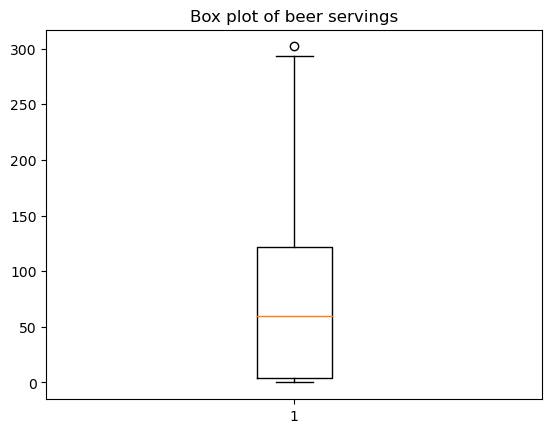

In [28]:
# plot the spirit_serving column again
plt.boxplot(data['spirit_servings'])
plt.title('Box plot of beer servings')

Text(0.5, 1.0, 'Box plot of wine servings')

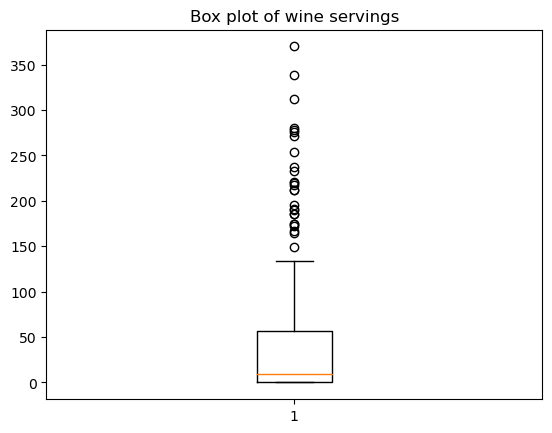

In [29]:
# check outliers in wine_serving column
plt.boxplot(data['wine_servings'])
plt.title('Box plot of wine servings')


In [30]:
# there is an outliers in wine_serving column
q1 = np.percentile(data['wine_servings'],25,
                   interpolation='midpoint')
q2 = np.percentile(data['wine_servings'],50,
                   interpolation='midpoint')
q3 = np.percentile(data['wine_servings'],75,
                   interpolation='midpoint')
iqr = q3-q1
low_limit = q1-1.5*iqr
up_limit = q3+1.5*iqr
print(low_limit)
print(up_limit)

-83.75
142.25


C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_15240\640937288.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data['wine_servings'],25,
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_15240\640937288.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2 = np.percentile(data['wine_servings'],50,
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_15240\640937288.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoi

In [31]:
outlier = []
for x in data['wine_servings']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)


In [32]:
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [33]:
ind1 = data['wine_servings']>up_limit
data.loc[ind1].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

In [34]:
data.drop([3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,
           65,  67, 75,  81,  83,  99, 120, 121, 136,
           140, 156, 165, 166, 182, 185],
           inplace = True)

Text(0.5, 1.0, 'Box plot of wine servings')

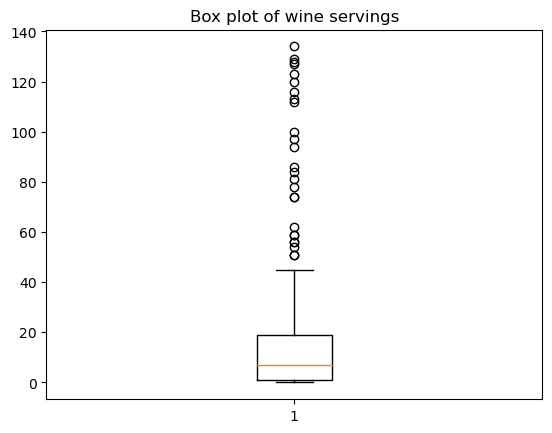

In [35]:
# plot the wine_serving column again
plt.boxplot(data['wine_servings'])
plt.title('Box plot of wine servings')

Text(0.5, 1.0, 'Box plot of total_liters_of_pure_alcohol')

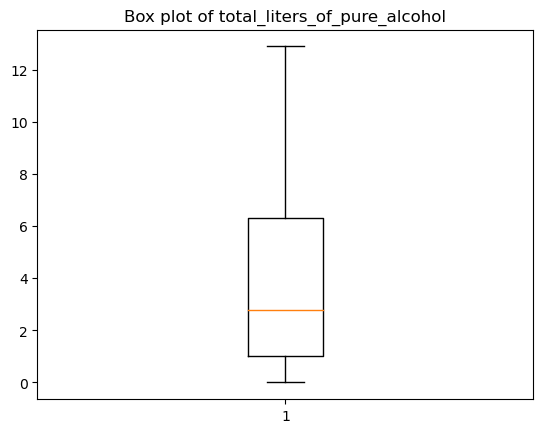

In [36]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('Box plot of total_liters_of_pure_alcohol')

In [37]:
q1 = np.percentile(data['total_litres_of_pure_alcohol'],25,interpolation="midpoint")
q2 = np.percentile(data['total_litres_of_pure_alcohol'],50,interpolation='midpoint')
q3 = np.percentile(data['total_litres_of_pure_alcohol'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)


1.0
2.8
6.3


C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_15240\305021784.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1 = np.percentile(data['total_litres_of_pure_alcohol'],25,interpolation="midpoint")
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_15240\305021784.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q2 = np.percentile(data['total_litres_of_pure_alcohol'],50,interpolation='midpoint')
C:\Users\ATHUL AKSHAY\AppData\Local\Temp\ipykernel_15240\305021784.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has

In [38]:
data['total_litres_of_pure_alcohol'].median()

2.8

In [39]:
outlier=[]
for x in data['total_litres_of_pure_alcohol']:
    if((x>up_limit)or(x<low_limit)):
        outlier.append(x)
outlier

[]

In [40]:
ind1=data['total_litres_of_pure_alcohol']>up_limit
data.loc[ind1].index


Int64Index([], dtype='int64')

In [41]:
data.drop([],inplace = True)

Text(0.5, 1.0, 'total_litres_of_pure_alcohol')

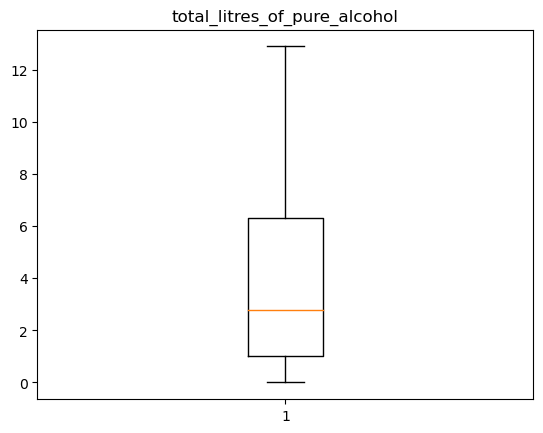

In [42]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title("total_litres_of_pure_alcohol")

In [43]:
data.shape

(162, 5)

In [44]:
data.continent.nunique()

6

In [45]:
data = pd.get_dummies(data)
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1,89.0,132.0,54.0,4.9,0,0,1,0,0,0
2,25.0,0.0,14.0,0.7,1,0,0,0,0,0
4,217.0,57.0,45.0,5.9,1,0,0,0,0,0
5,102.0,128.0,45.0,4.9,0,0,0,1,0,0


In [46]:
# corrmatrix = data.corr()
# plt.subplots(figsize=(20,8))
# sns.heatmap(corrmatrix,vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [47]:
# split the dataset and create the model
data.columns
y=data['total_litres_of_pure_alcohol']
X=data.drop('total_litres_of_pure_alcohol', axis=1)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,
                                                 test_size=0.2)

In [49]:
# create linear model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
prediction = model.predict(X_test)

In [50]:
# check the mse
from sklearn.metrics import mean_squared_error
print('MSE IS:', mean_squared_error(y_test,prediction))

MSE IS: 1.41071519845922


In [51]:
# r2 ed value
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,prediction))

R squared value is : 0.8413520664385031


In [52]:
# feature scaling
# standard scaling
# scaling is done on features

X.describe()

# type of x


,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
type(x)

float

In [54]:
data

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1,89.0,132.0,54.0,4.9,0,0,1,0,0,0
2,25.0,0.0,14.0,0.7,1,0,0,0,0,0
4,217.0,57.0,45.0,5.9,1,0,0,0,0,0
5,102.0,128.0,45.0,4.9,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
188,76.0,100.0,3.0,7.7,0,0,0,0,0,1
189,111.0,2.0,1.0,2.0,0,1,0,0,0,0
190,6.0,0.0,0.0,0.1,0,1,0,0,0,0
191,32.0,19.0,4.0,2.5,1,0,0,0,0,0


In [55]:
X.describe()

# here we get an error.because the dataframe is converted into numpy array.we want to covert it into dataframe

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
X=pd.DataFrame(X)
X.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# again create a linear regression model 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE Is:',mean_squared_error(y_test,prediction))
print(' R squared value is :',r2_score(y_test,prediction))
# standard scale not done any effect on the dataset

MSE Is: 1.41071519845922
 R squared value is : 0.8413520664385031


In [58]:
# min-max scaling
# we change the feature set x by standard scaling.again take x from the dataset
X=data.drop('total_litres_of_pure_alcohol',axis=1)
X.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
from sklearn import preprocessing

In [60]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
# apply this scaling to x.
X= min_max.fit_transform(X)
X= pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.230299,0.239208,0.153722,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,0.244585,0.262603,0.248742,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.045878,0.009934,0.007463,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.144947,0.142384,0.052239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.337766,0.399834,0.139925,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
# again create a linear Regression model
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE Is:',mean_squared_error(y_test,prediction))
print('R squared value is :',r2_score(y_test,prediction))
# minimax scaler not done any effect on the dataset

MSE Is: 1.4107151984592186
R squared value is : 0.8413520664385034


In [62]:
# normalisation
# normalisation is done in the feature set,so again load the feature set x
X=data.drop('total_litres_of_pure_alcohol',axis=1)
X.describe()


,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
X=preprocessing.normalize(X)


In [64]:
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.648990,0.475226,0.143663,0.031865,0.046742,0.012995,0.000695,0.007435,0.000298
std,0.325793,0.343203,0.181514,0.138976,0.190563,0.110713,0.002087,0.078627,0.001315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.404680,0.148553,0.017131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.756581,0.497608,0.068452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.940029,0.795130,0.208306,0.010918,0.004366,0.000000,0.000000,0.000000,0.000000
max,0.999961,0.996860,0.917663,1.000000,1.000000,1.000000,0.011570,1.000000,0.009300


In [65]:
# again create a linear regression model
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE Is:',mean_squared_error(y_test,prediction))
print('R squared value is :',r2_score(y_test,prediction))
# we get negative value is r2ed value.so the normalisation is not good for this dataset.
# it is good to be use in classification algorithm


MSE Is: 9.955758447853306
R squared value is : -0.11961684861297694


<Axes: >

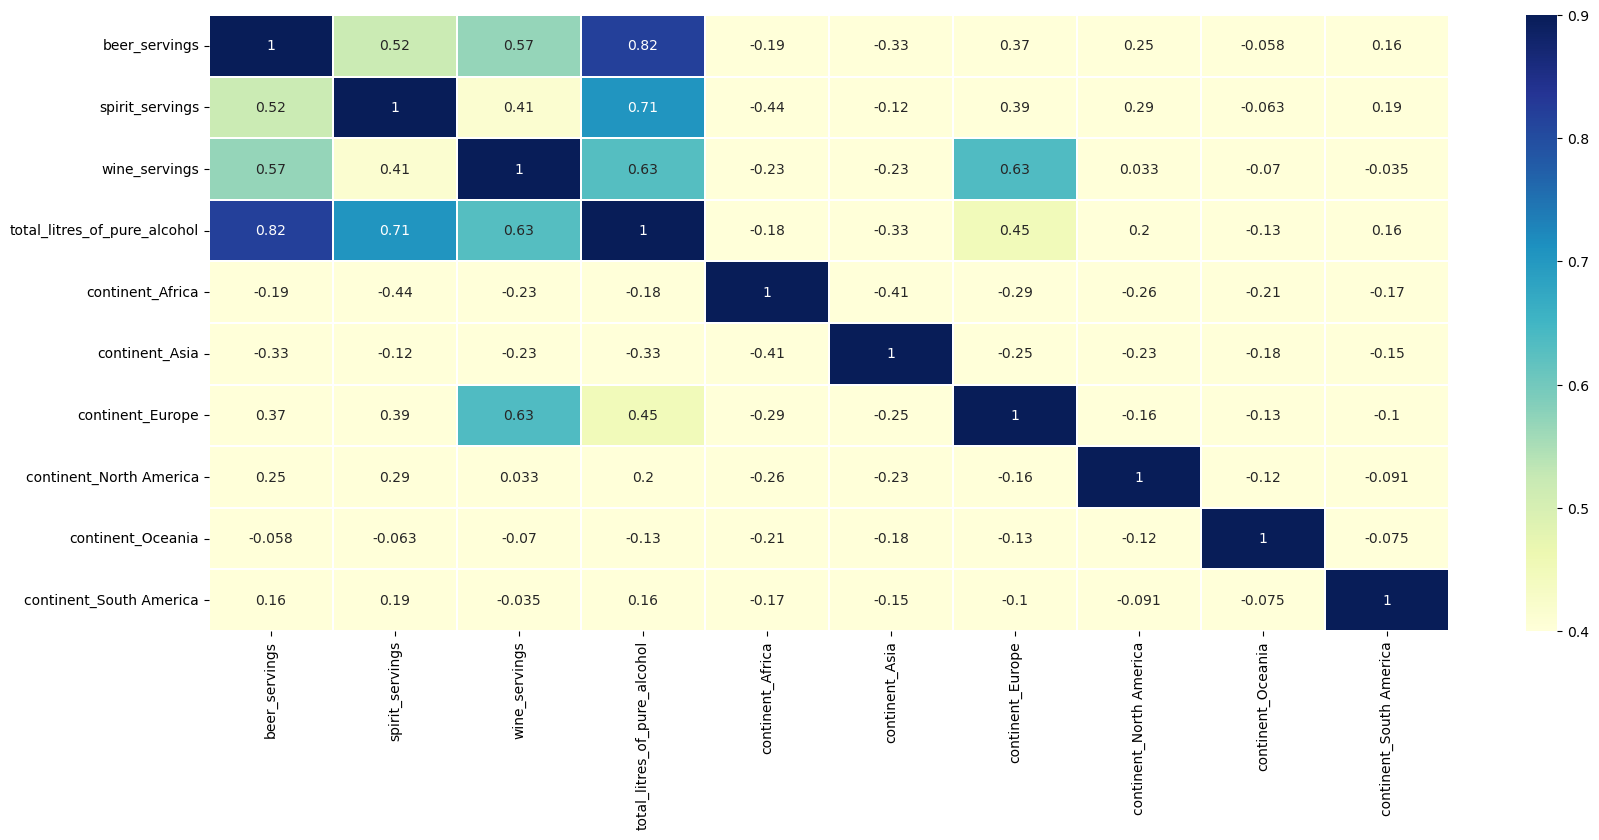

In [66]:
# feature reduction
# and check the model is improving

corrmatrix =data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')

In [70]:
#here the spirit_serving column and the wine_serving column has high correlation with the beer_servings column
#we can remove those two columns
data.columns



Index(['beer_servings', 'total_litres_of_pure_alcohol', 'continent_Africa',
       'continent_Asia', 'continent_Europe', 'continent_North America',
       'continent_Oceania', 'continent_South America'],
      dtype='object')

In [68]:
# drop the columns with high correlation
data.drop(['spirit_servings','wine_servings'],axis=1,inplace=True)

In [69]:
# again create a linear regression model
y=data['total_litres_of_pure_alcohol']
X=data.drop('total_litres_of_pure_alcohol',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE IS:',mean_squared_error(y_test,prediction))
print('R squared value is :',r2_score(y_test,prediction))

MSE IS: 2.78429780824533
R squared value is : 0.6868800349068506
